# Obtendo os dados

In [45]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

mp_usp = pd.read_csv("../data/mp2.5_usp_1_ano.csv", sep=";", skiprows=6, encoding='latin-1')[1:]
mp_gp = pd.read_csv("../data/mp2.5_guarulhos-pimenta_1_ano.csv", sep=";", skiprows=6, encoding='latin-1')[1:]
o3_usp = pd.read_csv("../data/ozonio_usp_1_ano.csv", sep=";", skiprows=6, encoding='latin-1')[1:]

dfs = [o3_usp, mp_usp, mp_gp]

In [46]:
def process_data(data):
    data.columns = ["Data", "Hora", "MediaHoraria"]
    data['MediaHoraria'] = data['MediaHoraria'].astype(float)
    data['Data'] = pd.to_datetime(data['Data'], format='%d/%m/%Y')
    data['Hora'] = data['Hora'].replace('24:00', '00:00')
    data['Hora'] = pd.to_datetime(data['Hora'], format='%H:%M').dt.hour

    return data

dfs = [process_data(df) for df in dfs]

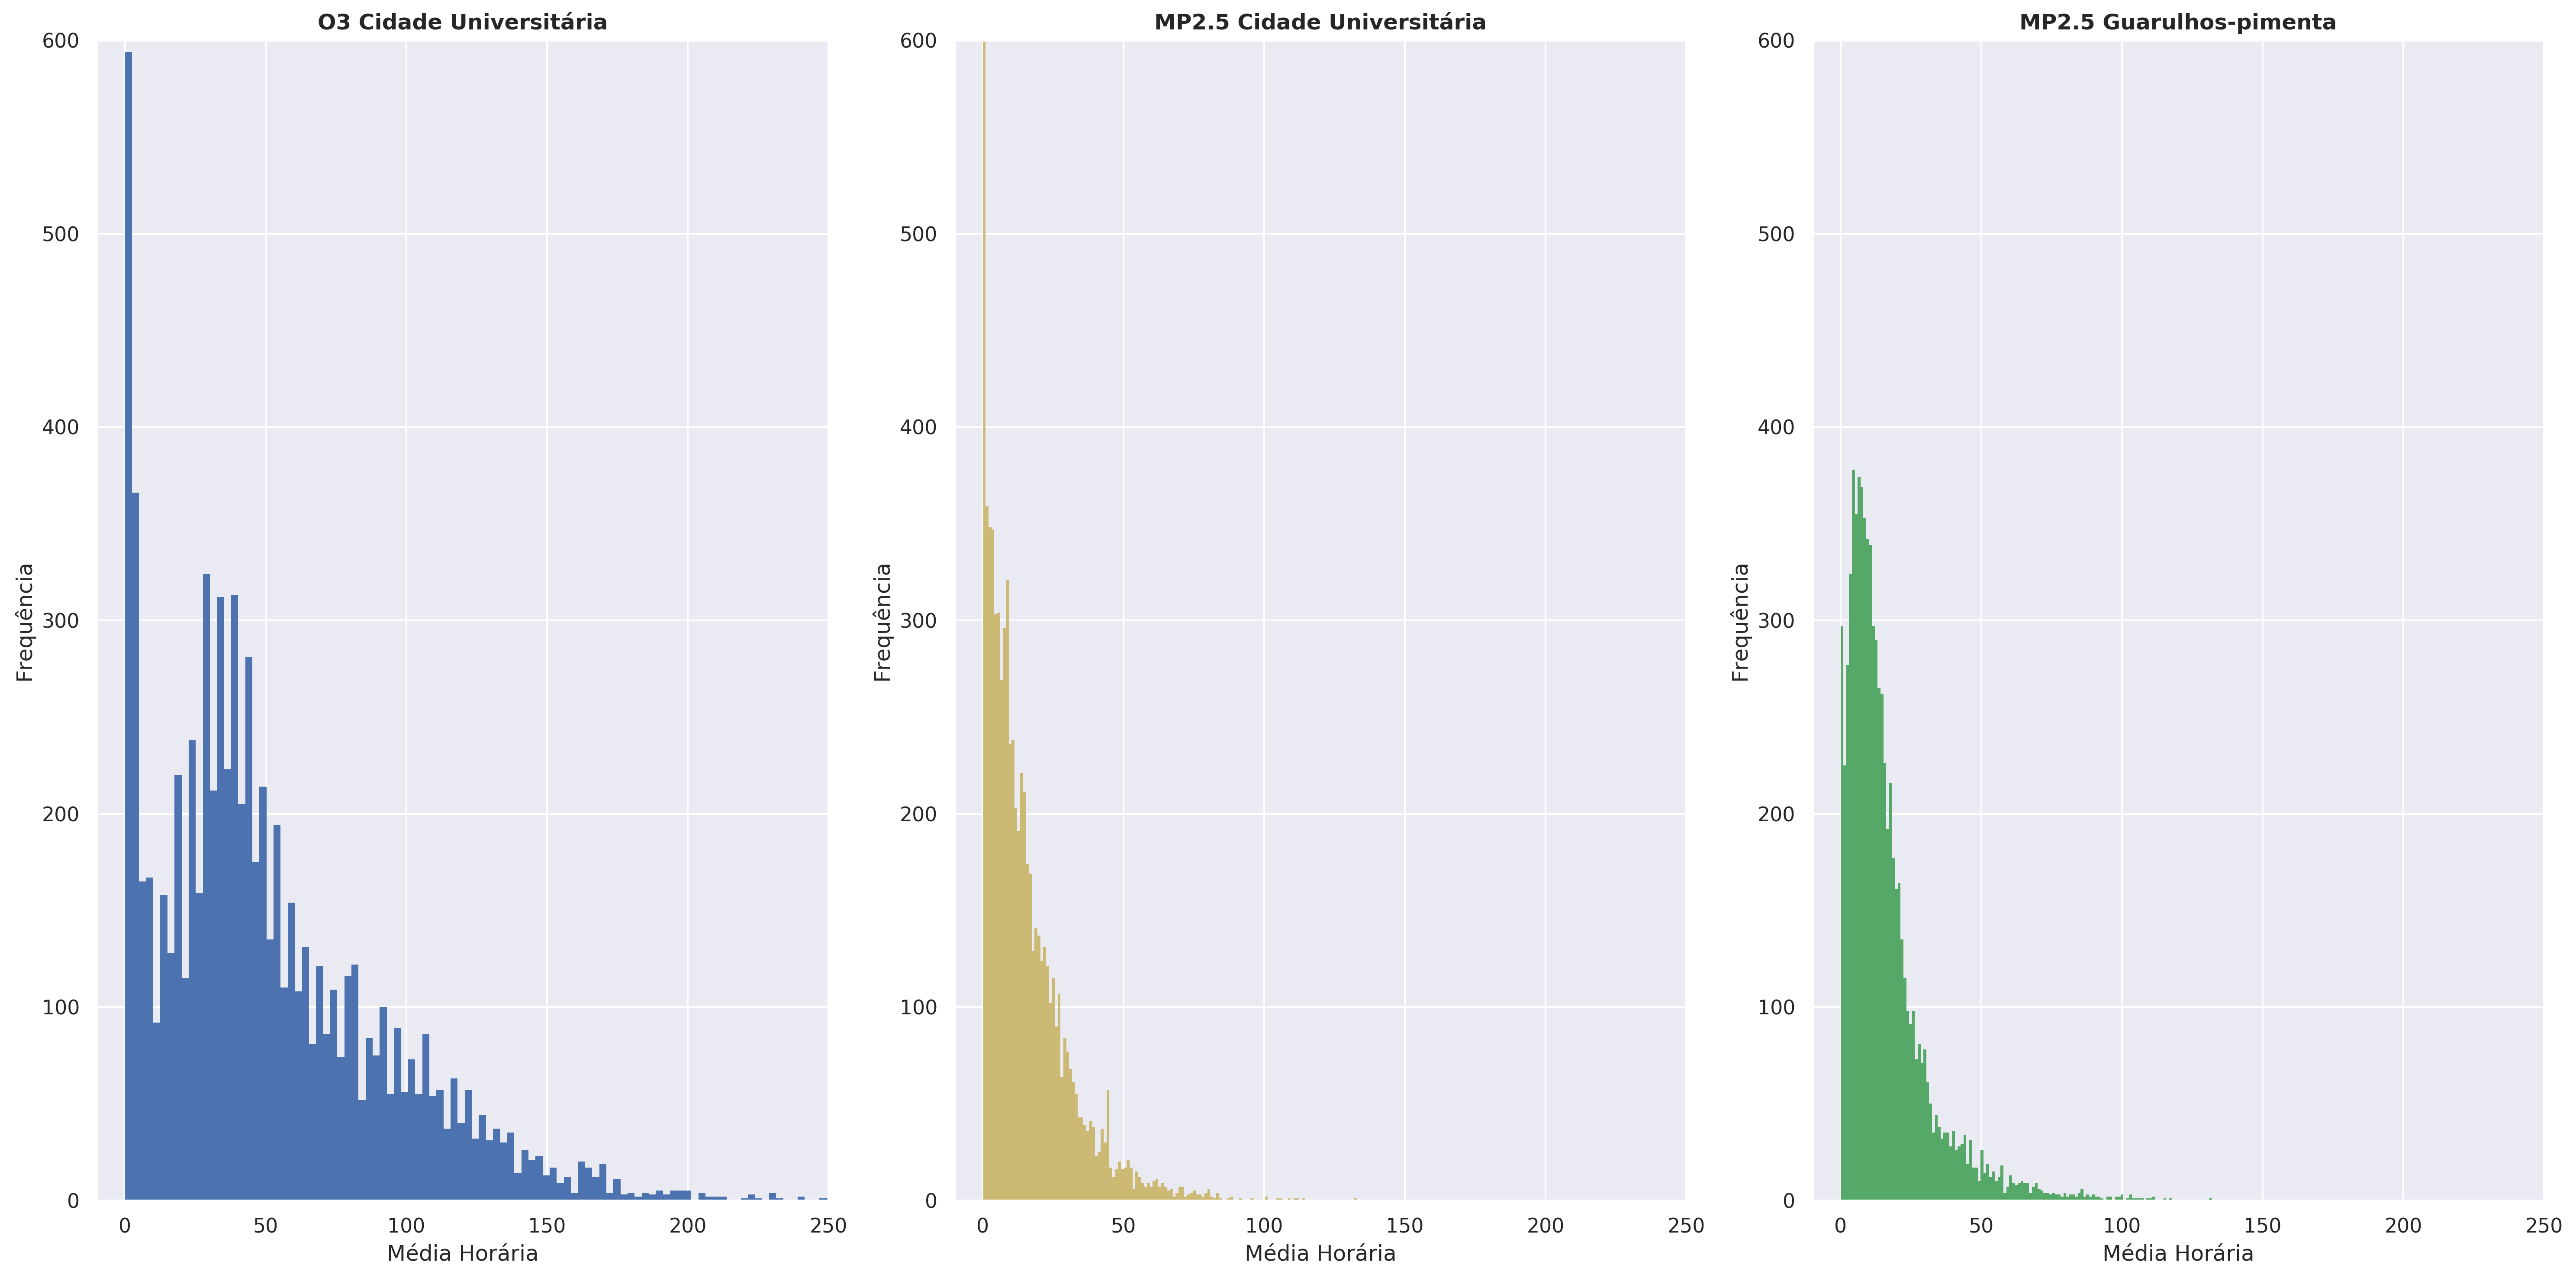

In [48]:
def plot_histograms(dfs, bins=130, figsize=(20, 10)):
    fig, axs = plt.subplots(1, 3, figsize=figsize)

    c = ("b", "y", "g")
    for i in range(3):
        axs[i].hist(dfs[i]["MediaHoraria"], bins=bins, color=c[i], edgecolor='none')
        axs[i].set_xlabel("Média Horária")
        axs[i].set_ylabel("Frequência")
        axs[i].set_xlim(-10, 250)
        axs[i].set_ylim(0, 600)

    axs[0].set_title("O3 Cidade Universitária", fontweight='bold')
    axs[1].set_title("MP2.5 Cidade Universitária", fontweight='bold')
    axs[2].set_title("MP2.5 Guarulhos-pimenta", fontweight='bold')

    plt.tight_layout()
    plt.show()

plot_histograms(dfs)

 - Concentração muito grande de zeros na cidade universitária -> Problema nos sensores?
 - Distribuição diferente entre poluentes

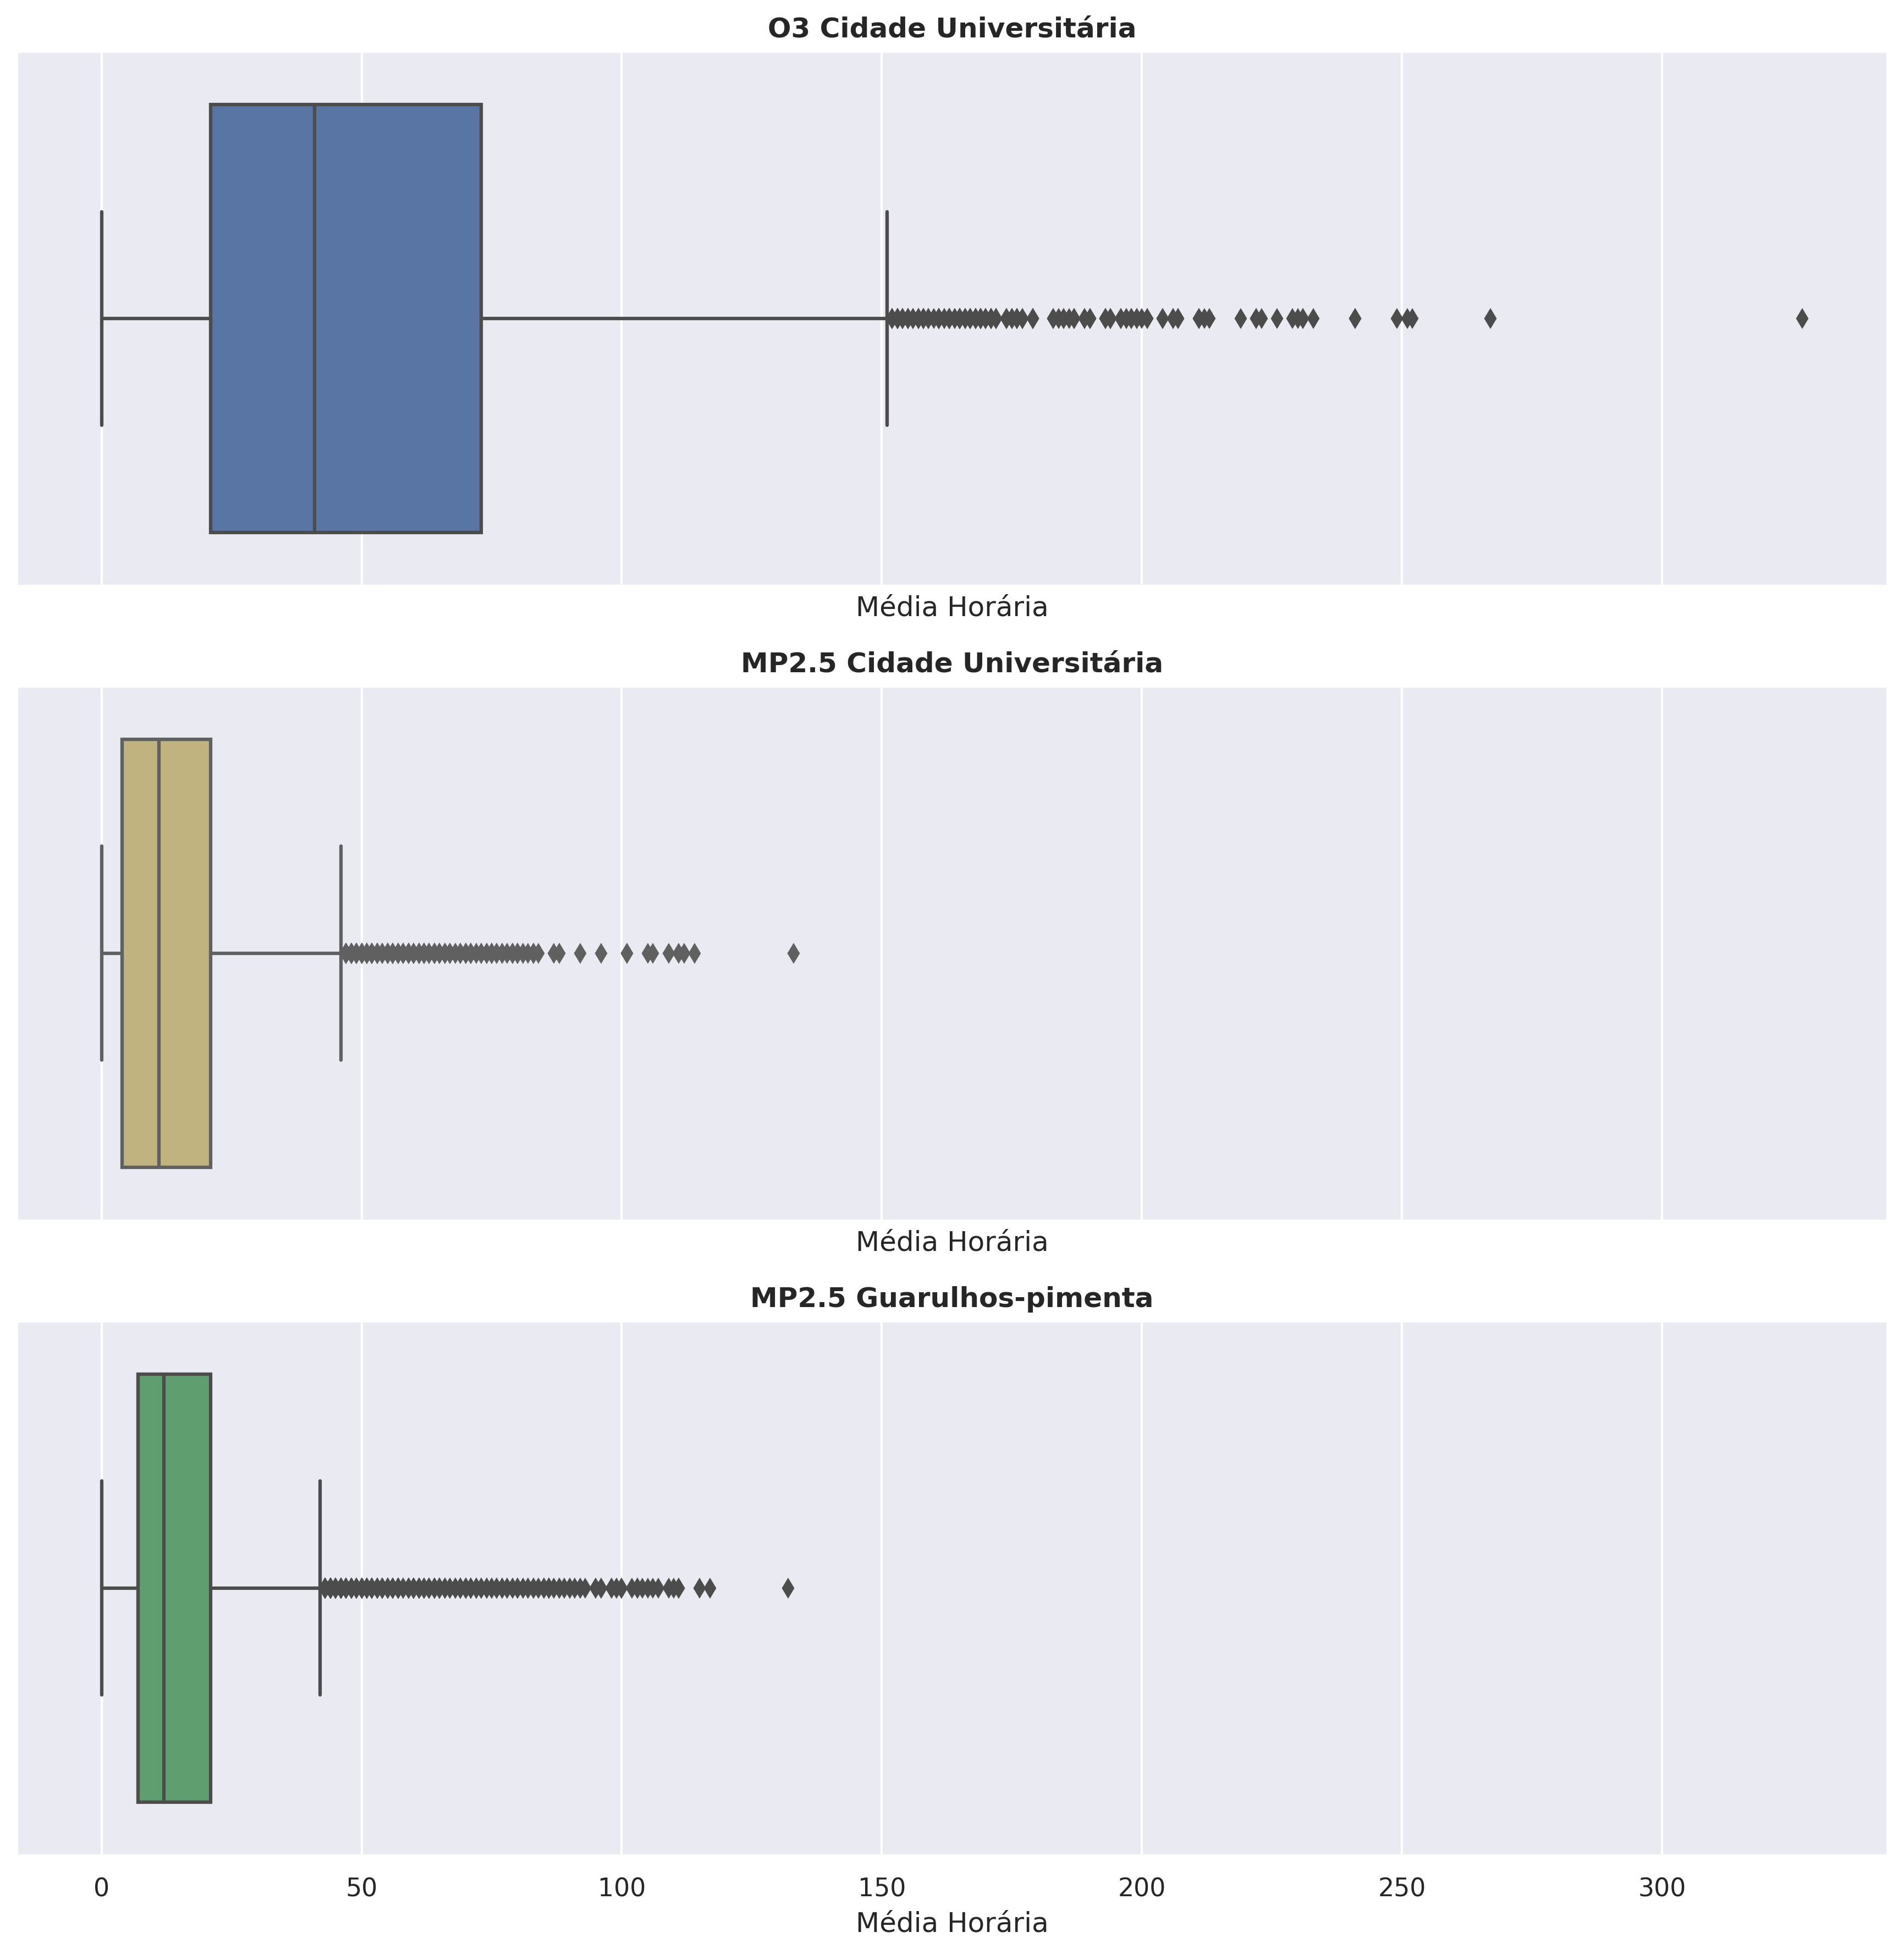

In [50]:
def plot_boxplots(dfs):

    #sns.set_theme(rc={'figure.figsize':(11.7, 12)})  # Adjusted height for three plots

    fig, axs = plt.subplots(3, 1, sharex=True)

    sns.boxplot(ax=axs[0], x="MediaHoraria", data=dfs[0], showfliers=True, color="b")
    axs[0].set_title("O3 Cidade Universitária", fontweight='bold')
    axs[0].set_xlabel("Média Horária")

    sns.boxplot(ax=axs[1], x="MediaHoraria", data=dfs[1], showfliers=True, color="y")
    axs[1].set_title("MP2.5 Cidade Universitária", fontweight='bold')
    axs[1].set_xlabel("Média Horária")
 
    sns.boxplot(ax=axs[2], x="MediaHoraria", data=dfs[2], showfliers=True, color="g")
    axs[2].set_title("MP2.5 Guarulhos-pimenta", fontweight='bold')
    axs[2].set_xlabel("Média Horária")  # Set x-label for the bottom plot

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_boxplots(dfs)


In [51]:
dfs = [df.groupby("Hora").mean()["MediaHoraria"] for df in dfs]
new_index = [(str(i)[:2]) for i in dfs[0].index]

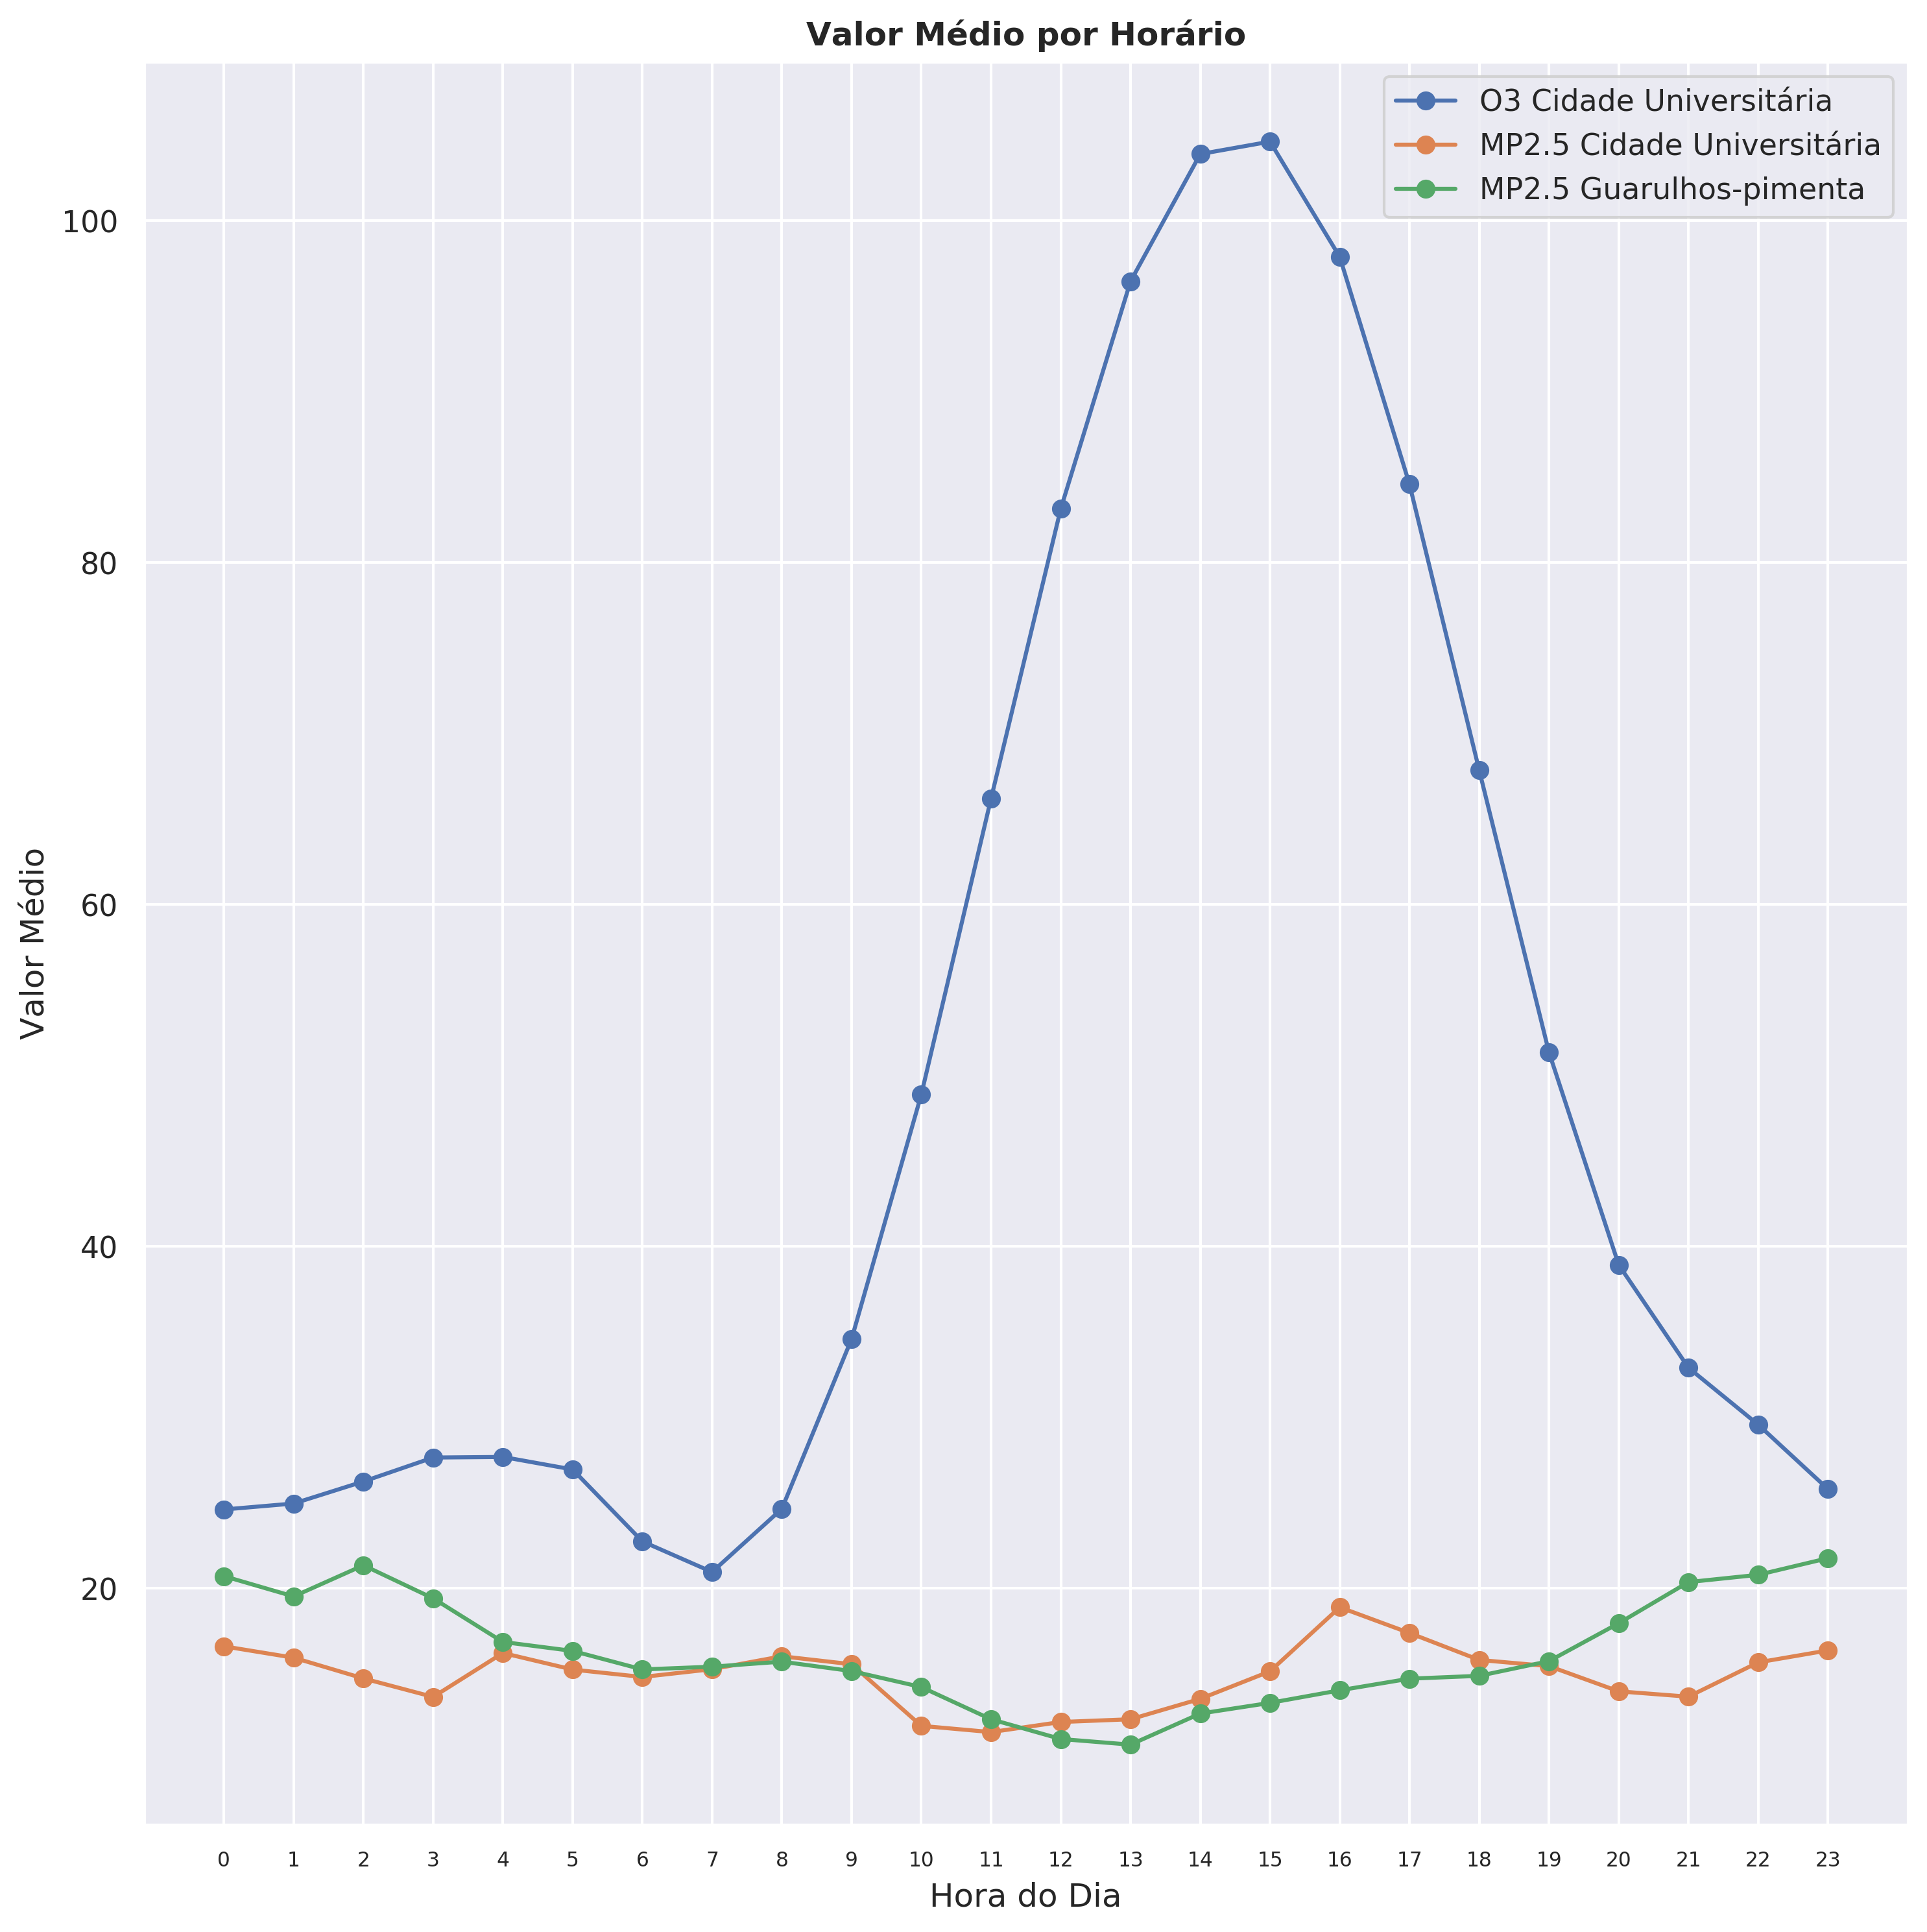

In [52]:

def plot_hour_dist(dfs):
    plt.plot(new_index, dfs[0], linestyle='-', label='O3 Cidade Universitária', marker='o', markersize=6)
    plt.plot(new_index, dfs[1], linestyle='-', label='MP2.5 Cidade Universitária', marker='o', markersize=6)
    plt.plot(new_index, dfs[2], linestyle='-', label='MP2.5 Guarulhos-pimenta', marker='o', markersize=6)
    plt.xticks(fontsize=7.5)
    plt.xlabel("Hora do Dia")
    plt.ylabel("Valor Médio")
    plt.title("Valor Médio por Horário", fontweight='bold')
    plt.grid(True)
    plt.legend()
    plt.show()


plot_hour_dist(dfs)

 - O3 possui uma distribuição com um pico muito bem determinado. Qual o motivo?